#### SGD Classifier

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

from src.paths import TRANSFORMED_DATA_DIR
from src.split_and_tfidf import split_and_vect
from src.stemming_and_lemming import stem_reviews

In [2]:
df = pd.read_parquet(TRANSFORMED_DATA_DIR /'cleaned_sentiments.parquet')

In [3]:
df_copy = df.copy()

In [4]:
# split the data and fit a tfidf vectorizer to it
X_train_vec, X_test_vec, y_train, y_test, tfidf_vec = split_and_vect(df_copy, 'cleaned', 'recommended')

In [5]:
# sgd classifier
sgd = SGDClassifier()

# fit to tfidf vectorizer
sgd.fit(X_train_vec, y_train)

# make predictions
y_pred = sgd.predict(X_test_vec)

In [6]:
# metrics 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       503
           1       0.89      0.85      0.87       276

    accuracy                           0.91       779
   macro avg       0.90      0.90      0.90       779
weighted avg       0.91      0.91      0.91       779



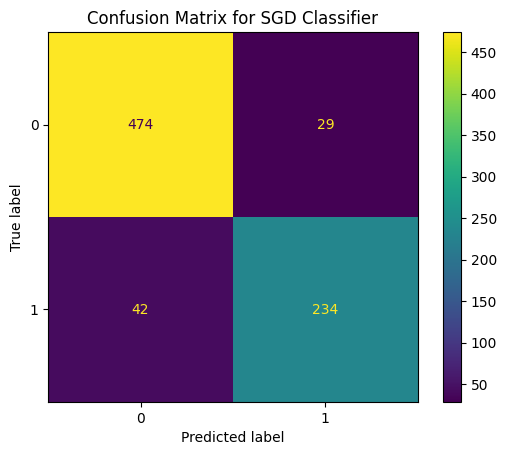

In [8]:
ConfusionMatrixDisplay.from_estimator(sgd, X_test_vec, y_test)
plt.title('Confusion Matrix for SGD Classifier')
plt.show()

In [11]:
# stemming
df_stem = df.copy()

# perform stemming on the data
df_stem['stemmed'] = stem_reviews(df_stem['cleaned'])

In [12]:
df_stem.tail()

,recommended,cleaned,stemmed
3887,0,Business LHR to BKK 747 400 First try back wit...,busi lhr to bkk 747 400 first tri back with ba...
3890,1,LHR to HAM Purser addresses all club passenger...,lhr to ham purser address all club passeng by ...
3891,0,My son who had worked for British Airways urge...,my son who had work for british airway urg me ...
3892,0,London City New York JFK via Shannon on A318 b...,london citi new york jfk via shannon on a318 b...
3893,0,SIN LHR BA12 B747 436 First Class Old aircraft...,sin lhr ba12 b747 436 first class old aircraft...


In [13]:
# split and vectorize
X_train_stem, X_test_stem, y_train, y_test, tfidf_stem_vec = split_and_vect(df_stem, 'stemmed', 'recommended')

# fit stemmed to sgd
# instantiate
sgd_stem = SGDClassifier()

# fit to the data
sgd_stem.fit(X_train_stem, y_train)

# make predictions
y_pred_stem = sgd_stem.predict(X_test_stem)


In [14]:
# metrics
print(classification_report(y_test, y_pred_stem))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       503
           1       0.89      0.87      0.88       276

    accuracy                           0.91       779
   macro avg       0.91      0.90      0.90       779
weighted avg       0.91      0.91      0.91       779



Text(0.5, 1.0, 'Confusion Matrix for SGD Classifier with Stemming')

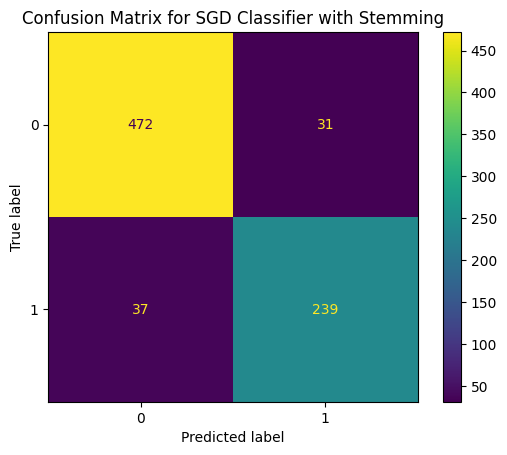

In [16]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(sgd_stem, X_test_stem, y_test)
plt.title('Confusion Matrix for SGD Classifier with Stemming')

#### Lemmatizing

In [17]:
# make a copy of the data
df_lemm = df.copy()

# lemmatize
from src.stemming_and_lemming import get_wordnet_pos, lemmatize_reviews

df_lemm['lemmatized'] = lemmatize_reviews(df['cleaned'])
df_lemm.head()

,recommended,cleaned,lemmatized
0,1,Very good flight following an equally good fli...,Very good flight follow an equally good flight...
1,1,An hours delay due to late arrival of the inco...,An hour delay due to late arrival of the incom...
2,0,I booked through BA because Loganair dont have...,I book through BA because Loganair dont have r...
3,0,British airways lost bags in LHR then found th...,British airway lose bag in LHR then find them ...
4,0,The check in process and reward loyalty progra...,The check in process and reward loyalty progra...


In [18]:
# split lemmatized data
X_train_lem, X_test_lem, y_train, y_test, tfidf_lem = split_and_vect(df_lemm, 'lemmatized', 'recommended')

# sgd classifier
sgd_lem = SGDClassifier()

# fit
sgd_lem.fit(X_train_lem, y_train)

# predict
y_pred_lem = sgd_lem.predict(X_test_lem)

# classification report
print(classification_report(y_test, y_pred_lem))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       503
           1       0.79      0.73      0.76       276

    accuracy                           0.84       779
   macro avg       0.83      0.81      0.82       779
weighted avg       0.84      0.84      0.84       779



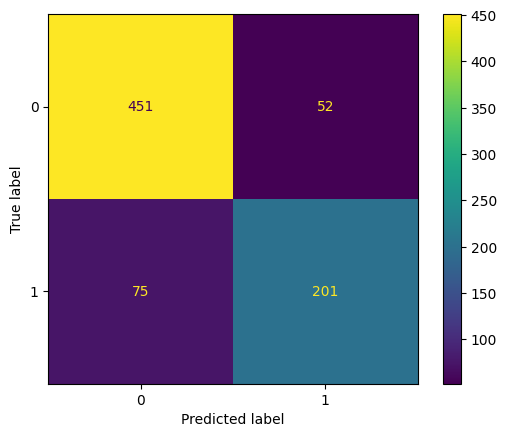

In [19]:
ConfusionMatrixDisplay.from_estimator(sgd_lem, X_test_lem, y_test)